In [74]:
import pandas as pd
pd.set_option("display.max.rows",None)

import matplotlib.pyplot as plt
%matplotlib inline



In [75]:
path='D:\DataSets\Corona\World\To_csv\Vaccanations.csv'
path=path.replace('\\','/')

df=pd.read_csv(path)

In [76]:
'''
Convert the date column to datetime and set it as an index. This is
It is important first to set the index and then convert it into datetime. Otherwise it is just a range of numbers
You need to define the inplace=True parameter,
otherthis,it just adds the date as a secound index and turn the first index (0,1,2,3) into a non sense datetime format
'''
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)

In [77]:
#The freq=None is the issue. Look below
df.index

DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
               '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
      

In [78]:
'''
It is not clear, in which frequency the dates are collected. So we will define them as collected by day.
With that premise we can make some grouping with the datetime of the index.
Avaible frequencys are:
H=Hour
D=Day
B=Business day
W=weekly
M=monthly
Q=quarterly
A=annual
and many others..
'''
df_freq=df.asfreq('D')

In [79]:
#Now the freq=D for day
df_freq.index

DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
               '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29', '2021-01-30', '2021-01-31',
               '2021-02-01', '2021-02-02', '2021-02-03', '2021-02-04',
               '2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14', '2021-02-15', '2021-02-16',
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
      

In [80]:
#As the index is now define as daily frequency we can go for grouping
#First, we want to group by the date for every weak and calculate the mean of each column.
#The columns also can be spezified, if desired
df_freq.resample('W').mean().round()

,FirstVaccanations,SecoundVaccanations,TotalVaccanations
Date,,,
2020-12-27,23569.0,0.0,23569.0
2021-01-03,37132.0,0.0,37132.0
2021-01-10,52831.0,0.0,52831.0
2021-01-17,75278.0,2079.0,77357.0
2021-01-24,62367.0,33298.0,95666.0
2021-01-31,49120.0,47339.0,96458.0
2021-02-07,52927.0,64074.0,117001.0
2021-02-14,63481.0,59476.0,122958.0
2021-02-21,81330.0,48223.0,129553.0


In [81]:
df_freq.resample('M').mean().round()

,FirstVaccanations,SecoundVaccanations,TotalVaccanations
Date,,,
2020-12-31,36316.0,0.0,36316.0
2021-01-31,57390.0,18678.0,76068.0
2021-02-28,77199.0,55249.0,132449.0
2021-03-31,172663.0,55047.0,227710.0


In [96]:
# A 7-day rolling mean
df_7d_rolling=df_freq.rolling(window=7).mean().round()
df_7d_rolling.head(15)

,FirstVaccanations,SecoundVaccanations,TotalVaccanations
Date,,,
2020-12-27,NaN,NaN,NaN
2020-12-28,NaN,NaN,NaN
2020-12-29,NaN,NaN,NaN
2020-12-30,NaN,NaN,NaN
2020-12-31,NaN,NaN,NaN
2021-01-01,NaN,NaN,NaN
2021-01-02,36930.0,0.0,36930.0
2021-01-03,37132.0,0.0,37132.0
2021-01-04,41410.0,0.0,41410.0


<AxesSubplot:xlabel='Date'>

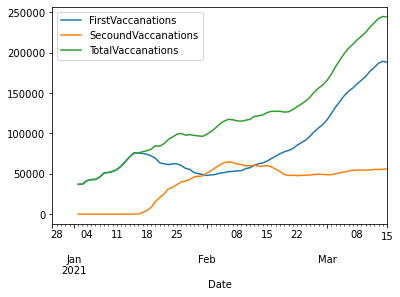

In [97]:
df_7d_rolling.plot()

In [100]:
df_365d_rolling=df_freq.rolling(window=30).mean().round()

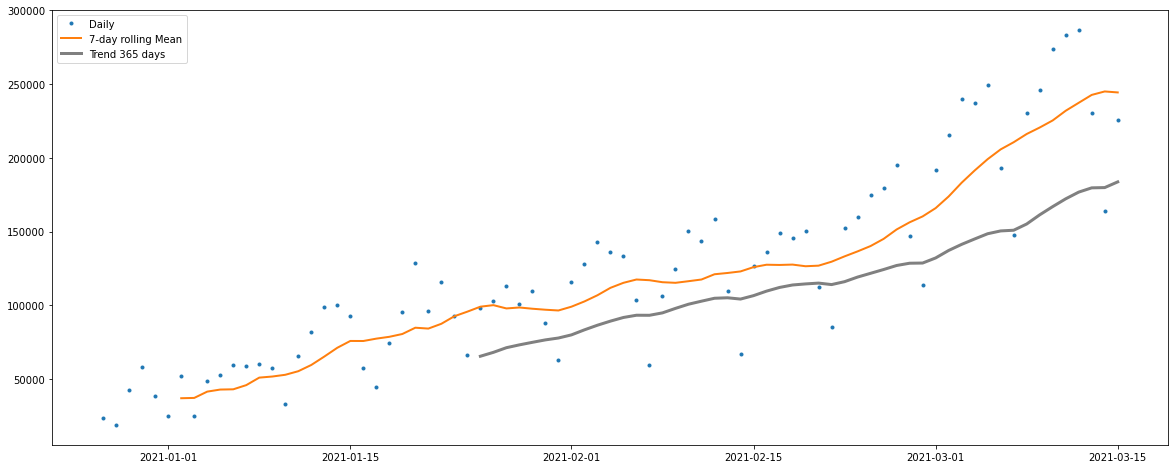

In [119]:
fig,ax=plt.subplots(figsize=(20,8))
#daily data
ax.plot(df['TotalVaccanations'],
       marker='.',
       linestyle='None',
       label='Daily')
#plotting 7day rolling
ax.plot(df_7d_rolling['TotalVaccanations'],
      linewidth=2,
      label='7-day rolling Mean')

#plotting anual data
ax.plot(df_365d_rolling['TotalVaccanations'],
       color='0.5',
       linewidth=3,
       label='Trend 365 days')

#Beautifulication
ax.legend()